# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import klib
import sklearn

# Importing data

In [2]:
planes = pd.read_csv('planes.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flight_data.csv')
carriers = pd.read_csv('carriers.csv')
weather = pd.read_csv('weather.csv')
p15 = pd.read_csv('Processed_data15.csv')
p45 = pd.read_csv('Processed_data45.csv')
dest=pd.read_excel('Dest.xlsx')

# Performing EDA

## Planes

In [3]:
planes.head()

,tailnum,year_manu,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [4]:
planes.shape

(3322, 9)

In [5]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year_manu     3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB


In [6]:
planes.describe()

,year_manu,engines,seats,speed
count,3252.000000,3322.000000,3322.000000,23.000000
mean,2000.484010,1.995184,154.316376,236.782609
std,7.193425,0.117593,73.654974,149.759794
min,1956.000000,1.000000,2.000000,90.000000
25%,1997.000000,2.000000,140.000000,107.500000
50%,2001.000000,2.000000,149.000000,162.000000
75%,2005.000000,2.000000,182.000000,432.000000
max,2013.000000,4.000000,450.000000,432.000000


In [7]:
planes.isnull().sum()

tailnum            0
year_manu         70
type               0
manufacturer       0
model              0
engines            0
seats              0
speed           3299
engine             0
dtype: int64

In [8]:
planes['speed'].fillna(planes['speed'].median(),inplace=True)

In [9]:
planes.dropna(how='any',inplace=True)

In [10]:
planes.isnull().sum()

tailnum         0
year_manu       0
type            0
manufacturer    0
model           0
engines         0
seats           0
speed           0
engine          0
dtype: int64

In [11]:
klib.data_cleaning(planes)

Shape of cleaned data: (3252, 9)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.16 MB (-64.0%)



,tailnum,year_manu,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,162.0,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,162.0,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,162.0,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,162.0,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,162.0,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3247,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,162.0,Turbo-fan
3248,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,162.0,Turbo-fan
3249,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,162.0,Turbo-fan
3250,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,162.0,Turbo-jet


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_manu'>

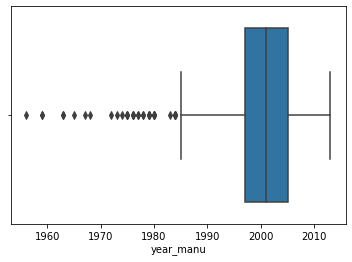

In [12]:
sns.boxplot(planes['year_manu'])

In [13]:
print(np.where(planes['year_manu']<1985))

(array([ 190,  416,  419,  801,  873,  996, 1006, 1016, 1024, 1167, 1406,
       1451, 1455, 1489, 1557, 1662, 1693, 1781, 1788, 1793, 1797, 1834,
       1850, 2096, 2193, 2271, 2305, 2332, 2361, 2388, 2427, 2438, 2447,
       2457, 2653], dtype=int64),)


In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [15]:
low,up=remove_outlier(planes['year_manu'])
planes['year_manu']=np.where(planes['year_manu']>up,up,planes['year_manu'])
planes['year_manu']=np.where(planes['year_manu']<low,low,planes['year_manu'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_manu'>

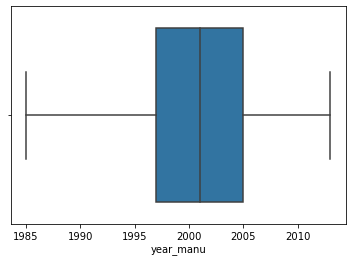

In [16]:
sns.boxplot(planes['year_manu'])

<AxesSubplot:xlabel='speed', ylabel='Density'>

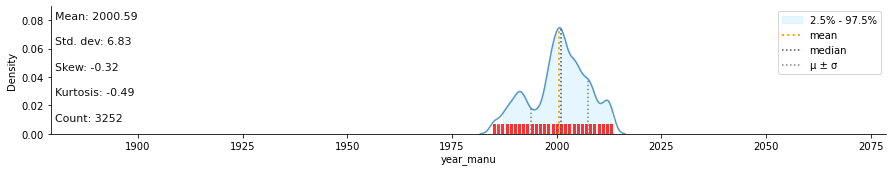

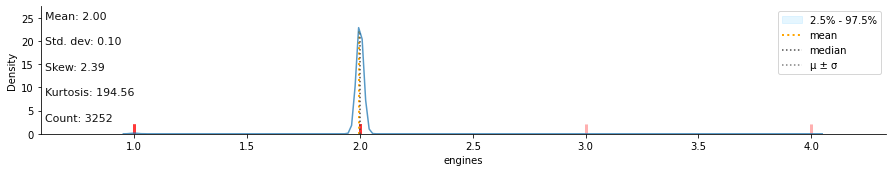

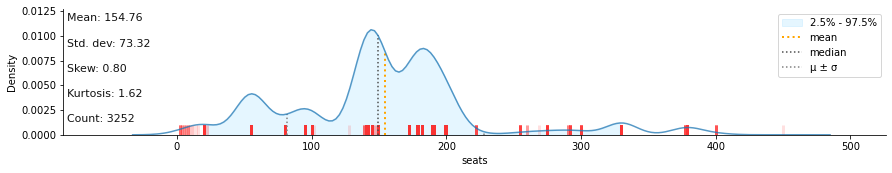

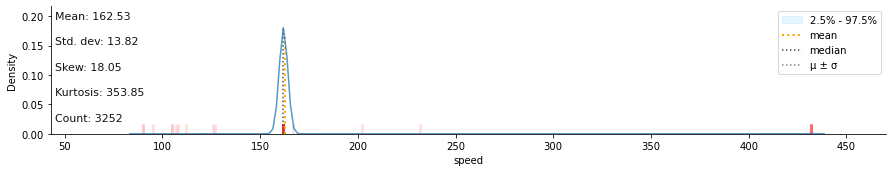

In [17]:
klib.dist_plot(planes,showall=True)

GridSpec(6, 5)

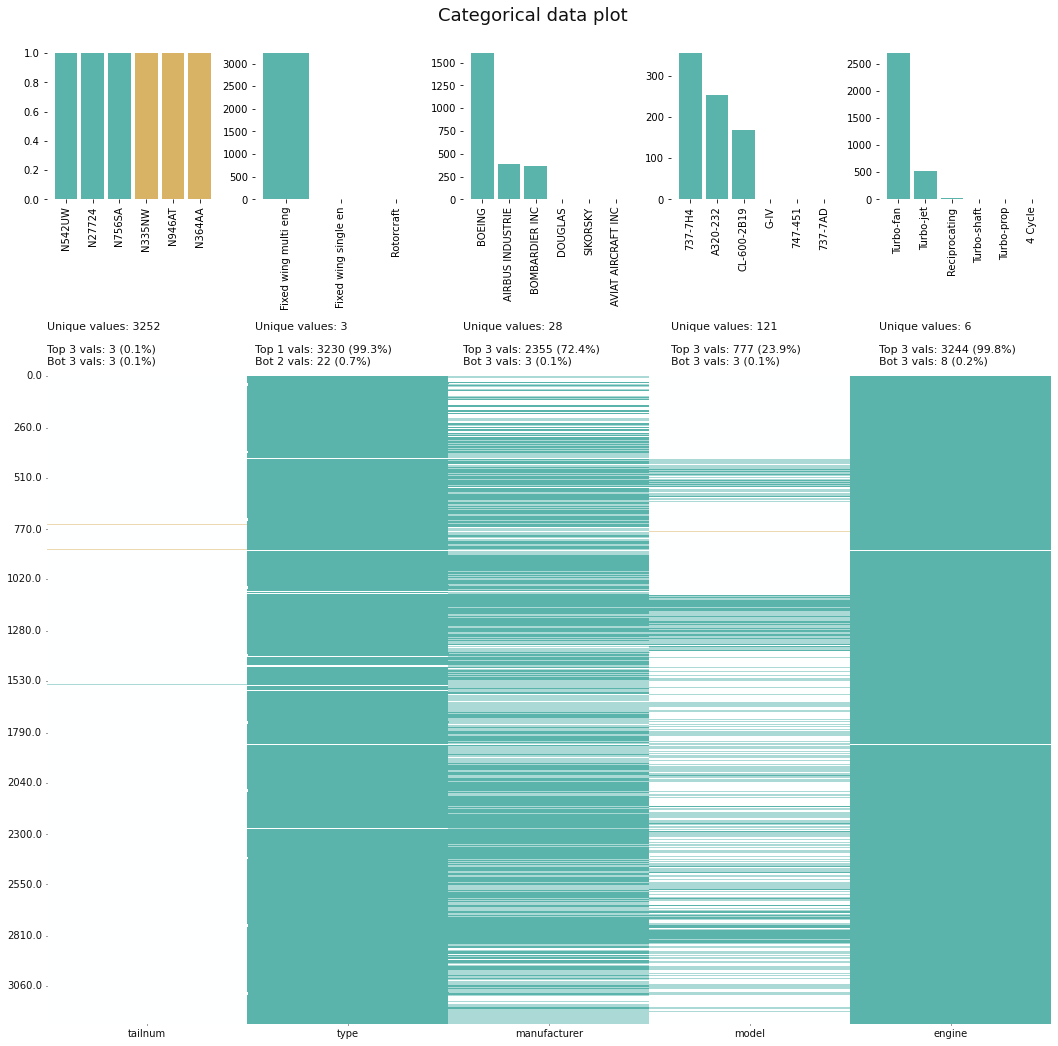

In [18]:
klib.cat_plot(planes)

<AxesSubplot:>

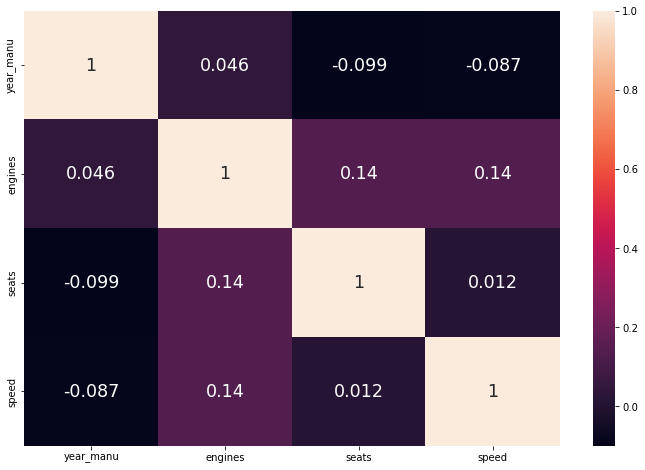

In [19]:
plt.figure(figsize = (12,8))
data_corr=planes.corr()
sns.heatmap(data_corr,annot_kws={"size": 35 / np.sqrt(len(data_corr))}, annot=True)

## Airports

In [20]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [21]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [22]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [23]:
airports.dropna(how='any',inplace=True)

In [24]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [25]:
airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


<AxesSubplot:xlabel='LONGITUDE', ylabel='Density'>

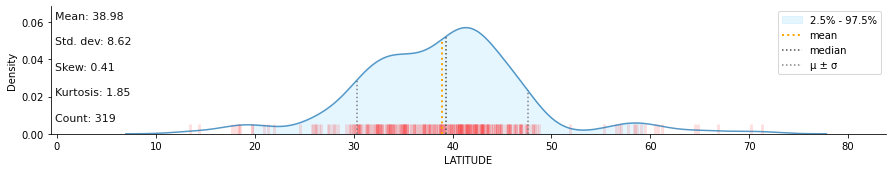

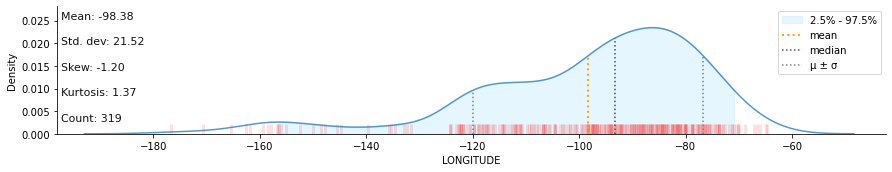

In [26]:
klib.dist_plot(airports,showall=True)

GridSpec(6, 5)

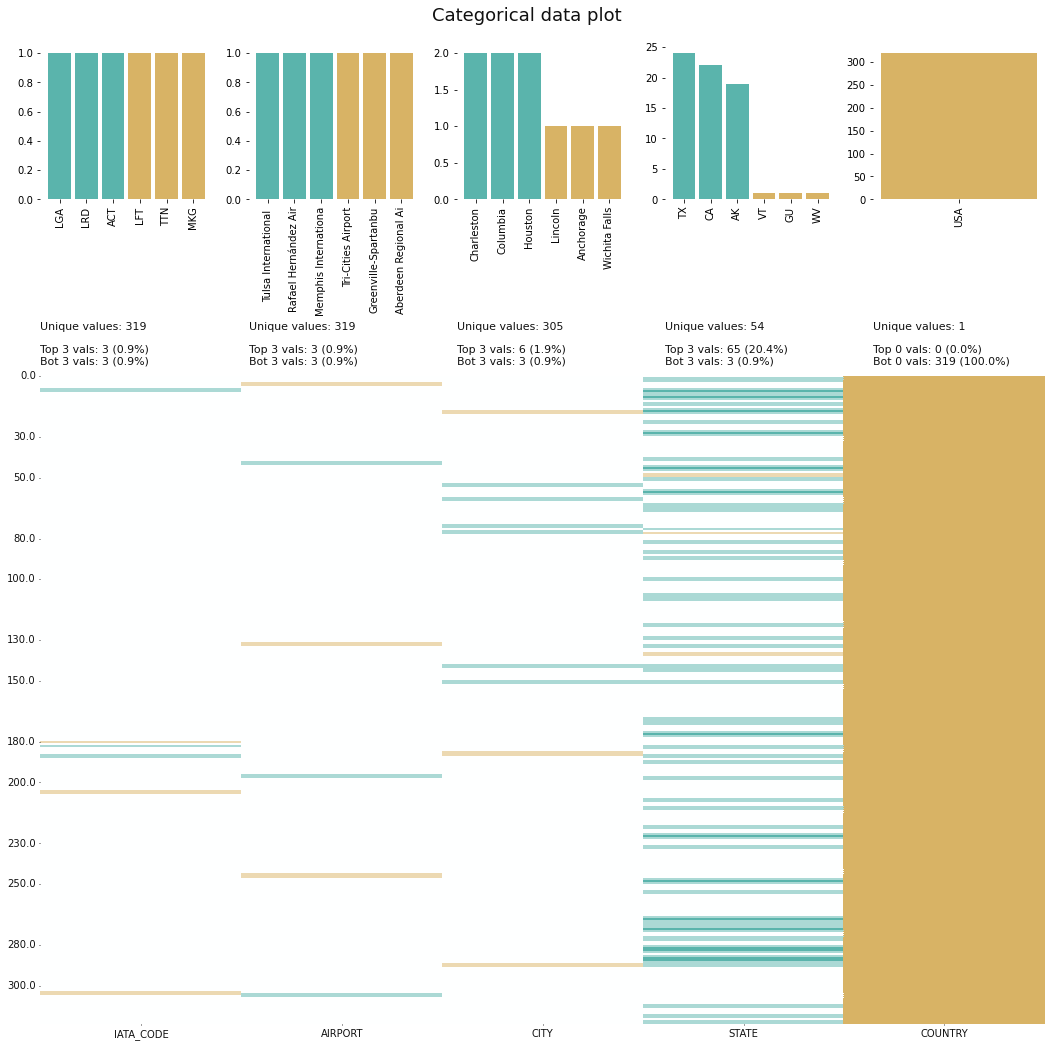

In [27]:
klib.cat_plot(airports)

## Flights

In [28]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [29]:
flights.shape

(336776, 19)

In [30]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [31]:
flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [32]:
flights.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [33]:
flights.dropna(how='any',inplace=True)

In [34]:
flights.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [35]:
klib.data_cleaning(flights)

Shape of cleaned data: (327346, 18)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 1
     of which 1 single valued.     Columns: ['year']
Dropped missing values: 0
Reduced memory by at least: 37.22 MB (-74.51%)



,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2013 22:00
327342,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00
327343,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00
327344,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='minute', ylabel='Density'>

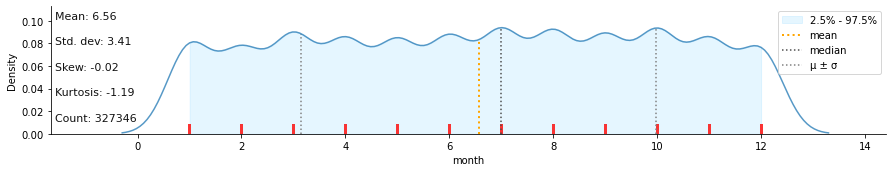

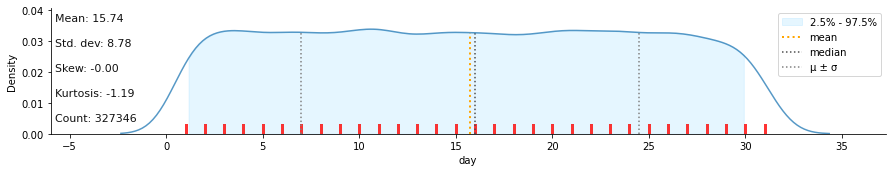

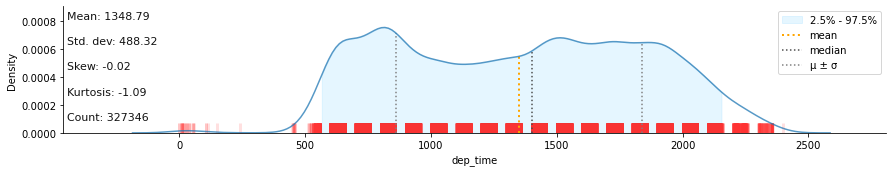

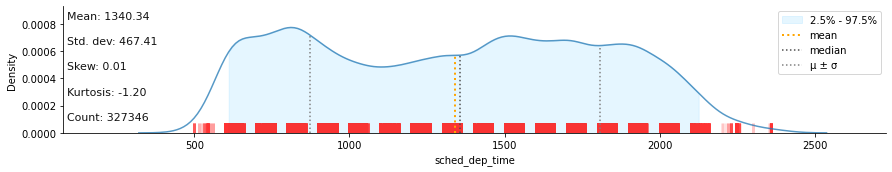

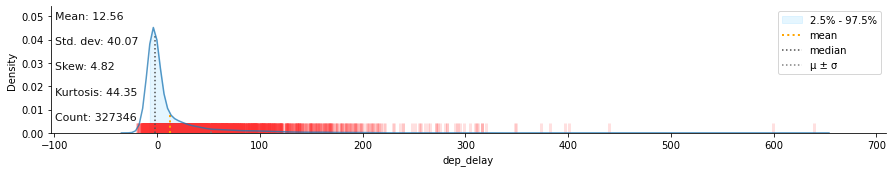

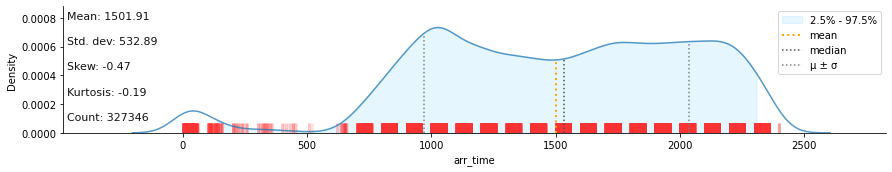

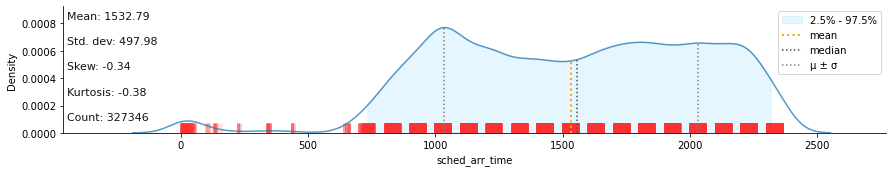

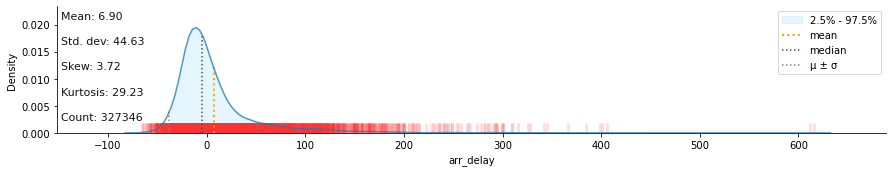

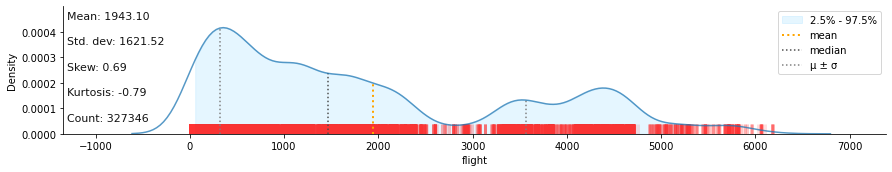

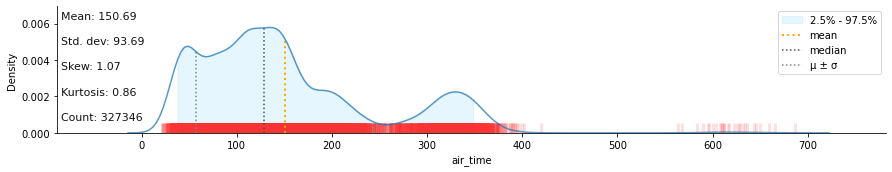

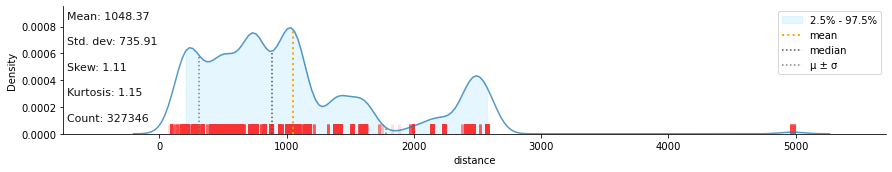

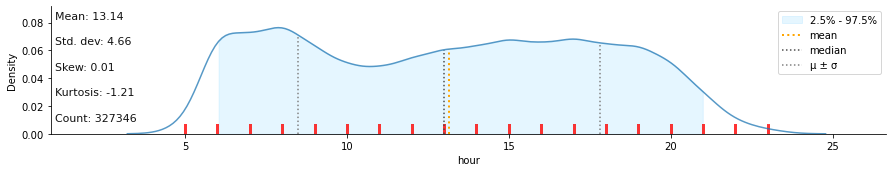

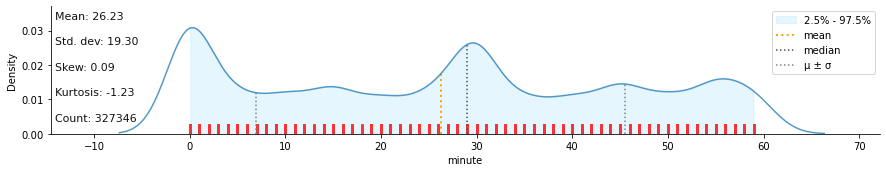

In [36]:
klib.dist_plot(flights,showall=True)

GridSpec(6, 5)

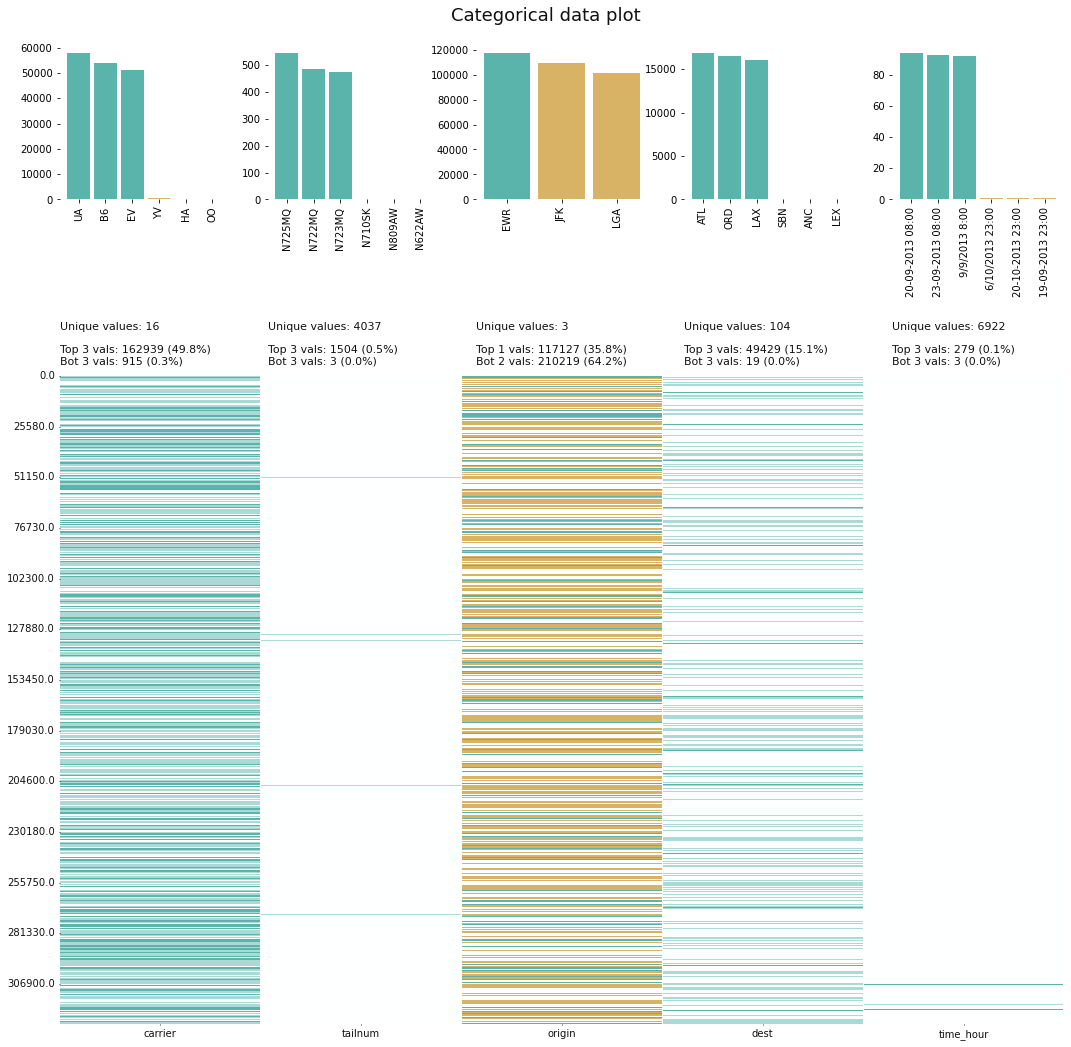

In [37]:
klib.cat_plot(flights)

<AxesSubplot:>

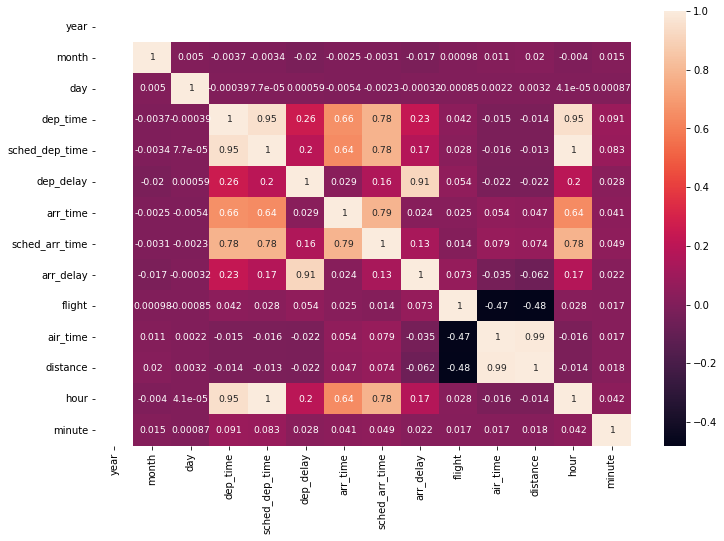

In [38]:
plt.figure(figsize = (12,8))
data_corr=flights.corr()
sns.heatmap(data_corr,annot_kws={"size": 35 / np.sqrt(len(data_corr))}, annot=True)

## Carriers

In [39]:
carriers

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


## Weather

In [40]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


In [41]:
weather.shape

(26130, 15)

In [42]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26130 entries, 0 to 26129
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      26130 non-null  object 
 1   year        26130 non-null  int64  
 2   month       26130 non-null  int64  
 3   day         26130 non-null  int64  
 4   hour        26130 non-null  int64  
 5   temp        26129 non-null  float64
 6   dewp        26129 non-null  float64
 7   humid       26129 non-null  float64
 8   wind_dir    25712 non-null  float64
 9   wind_speed  26127 non-null  float64
 10  wind_gust   26127 non-null  float64
 11  precip      26130 non-null  float64
 12  pressure    23400 non-null  float64
 13  visib       26130 non-null  float64
 14  time_hour   26130 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


In [43]:
weather.describe()

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,26130.0,26130.000000,26130.000000,26130.000000,26129.000000,26129.000000,26129.000000,25712.000000,26127.000000,26127.000000,26130.000000,23400.000000,26130.000000
mean,2013.0,6.505741,15.679717,11.518408,55.203515,41.385399,62.347322,198.066661,10.395868,11.963357,0.002726,1017.895175,9.204828
std,0.0,3.440031,8.765022,6.916581,17.782124,19.371649,19.196078,107.841624,8.521200,9.806027,0.019665,7.422790,2.136306
min,2013.0,1.000000,1.000000,0.000000,10.940000,-9.940000,12.740000,0.000000,0.000000,0.000000,0.000000,983.800000,0.000000
25%,2013.0,4.000000,8.000000,6.000000,39.920000,26.060000,46.990000,120.000000,6.904680,7.945768,0.000000,1012.900000,10.000000
50%,2013.0,7.000000,16.000000,12.000000,55.040000,42.080000,61.660000,220.000000,9.206240,10.594357,0.000000,1017.600000,10.000000
75%,2013.0,9.000000,23.000000,18.000000,69.980000,57.920000,78.620000,290.000000,13.809360,15.891535,0.000000,1023.000000,10.000000
max,2013.0,12.000000,31.000000,23.000000,100.040000,78.080000,100.000000,360.000000,1048.360580,1206.432388,1.180000,1042.100000,10.000000


In [44]:
weather.isnull().sum()

origin           0
year             0
month            0
day              0
hour             0
temp             1
dewp             1
humid            1
wind_dir       418
wind_speed       3
wind_gust        3
precip           0
pressure      2730
visib            0
time_hour        0
dtype: int64

In [45]:
weather['pressure'].fillna(weather['pressure'].median(),inplace=True)

In [46]:
weather['wind_dir'].fillna(weather['wind_dir'].median(),inplace=True)

In [47]:
weather.dropna(how='any',inplace=True)

In [48]:
weather.isnull().sum()

origin        0
year          0
month         0
day           0
hour          0
temp          0
dewp          0
humid         0
wind_dir      0
wind_speed    0
wind_gust     0
precip        0
pressure      0
visib         0
time_hour     0
dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pressure'>

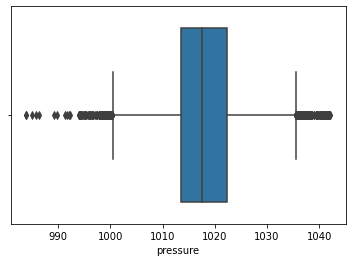

In [49]:
sns.boxplot(weather['pressure'])

In [50]:
low,up=remove_outlier(weather['pressure'])
weather['pressure']=np.where(weather['pressure']>up,up,weather['pressure'])
weather['pressure']=np.where(weather['pressure']<low,low,weather['pressure'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pressure'>

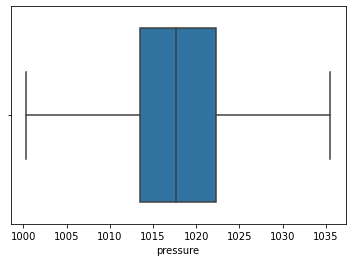

In [51]:
sns.boxplot(weather['pressure'])

In [52]:
klib.data_cleaning(weather)

Shape of cleaned data: (26126, 14)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 1
     of which 1 single valued.     Columns: ['year']
Dropped missing values: 0
Reduced memory by at least: 1.99 MB (-62.38%)



,origin,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,1,1,0,37.040001,21.920000,53.970001,230.0,10.357020,11.918652,0.0,1013.900024,10.0,2013-01-01T00:00:00Z
1,EWR,1,1,1,37.040001,21.920000,53.970001,230.0,13.809360,15.891536,0.0,1013.000000,10.0,2013-01-01T01:00:00Z
2,EWR,1,1,2,37.939999,21.920000,52.090000,230.0,12.658580,14.567241,0.0,1012.599976,10.0,2013-01-01T02:00:00Z
3,EWR,1,1,3,37.939999,23.000000,54.509998,230.0,13.809360,15.891536,0.0,1012.700012,10.0,2013-01-01T03:00:00Z
4,EWR,1,1,4,37.939999,24.080000,57.040001,240.0,14.960140,17.215830,0.0,1012.799988,10.0,2013-01-01T04:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26121,LGA,12,30,19,35.959999,19.940001,51.779999,340.0,13.809360,15.891536,0.0,1017.099976,10.0,2013-12-30T19:00:00Z
26122,LGA,12,30,20,33.980000,17.059999,49.509998,330.0,17.261700,19.864420,0.0,1018.799988,10.0,2013-12-30T20:00:00Z
26123,LGA,12,30,21,32.000000,15.080000,49.189999,340.0,14.960140,17.215830,0.0,1019.500000,10.0,2013-12-30T21:00:00Z
26124,LGA,12,30,22,30.920000,12.920000,46.740002,320.0,17.261700,19.864420,0.0,1019.900024,10.0,2013-12-30T22:00:00Z


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='visib', ylabel='Density'>

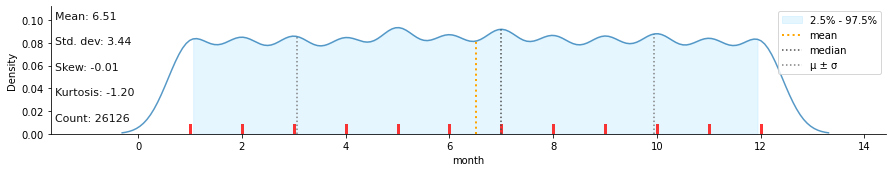

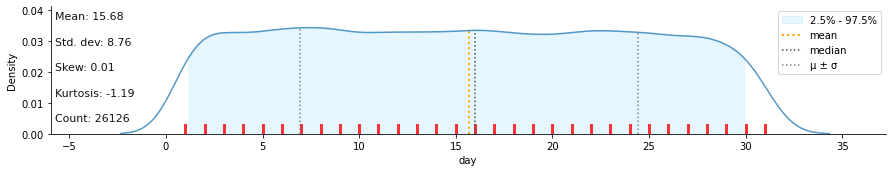

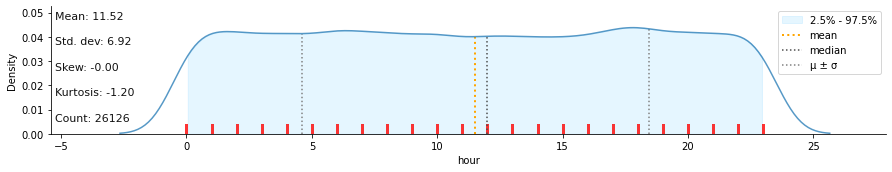

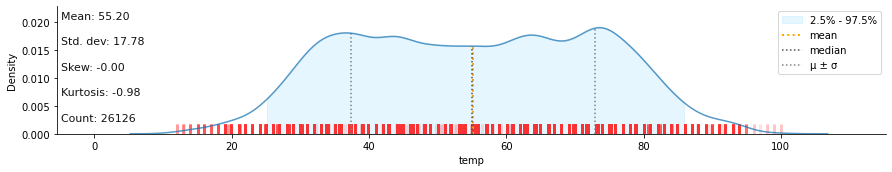

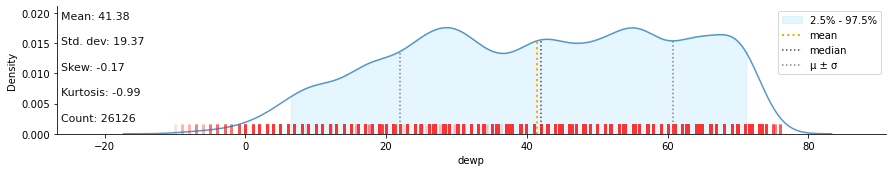

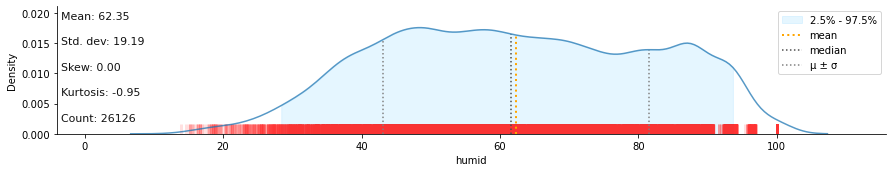

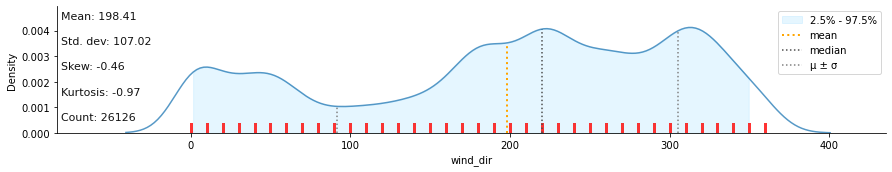

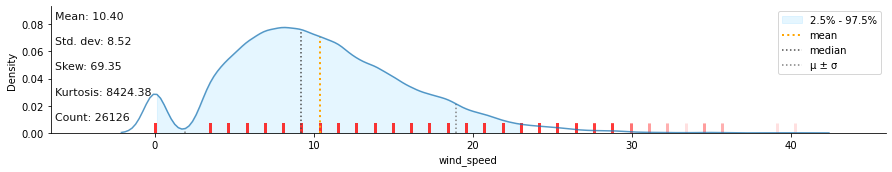

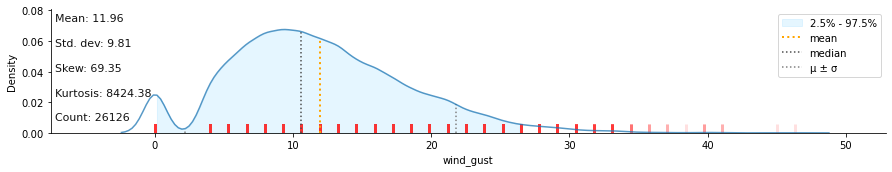

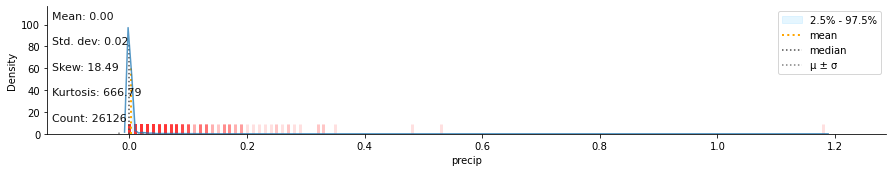

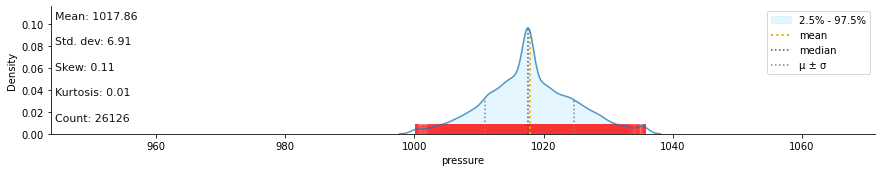

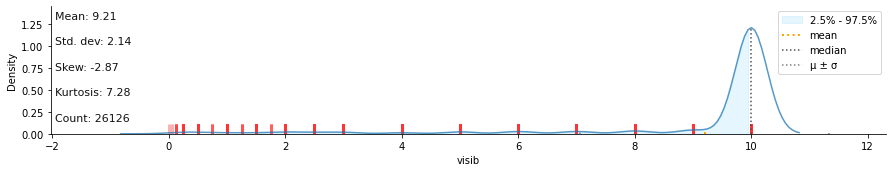

In [53]:
klib.dist_plot(weather,showall=True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='count'>

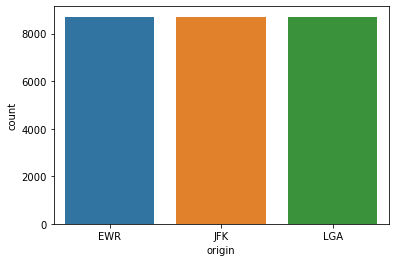

In [54]:
sns.countplot(weather['origin'])

<AxesSubplot:>

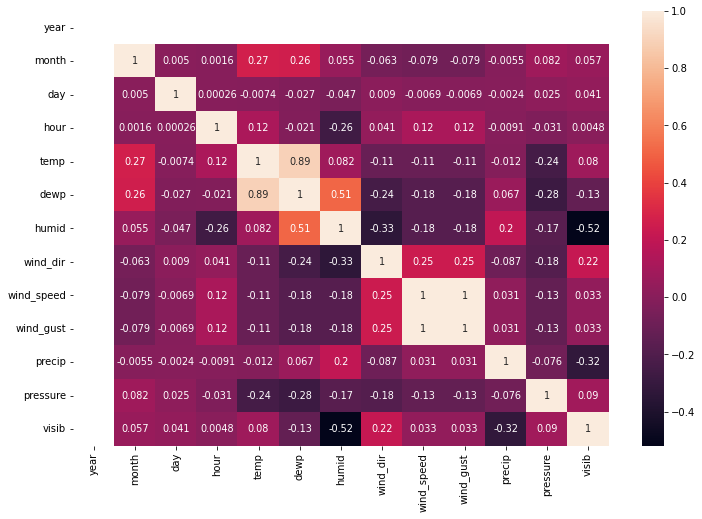

In [55]:
plt.figure(figsize = (12,8))
data_corr=weather.corr()
sns.heatmap(data_corr,annot_kws={"size": 35 / np.sqrt(len(data_corr))}, annot=True)

## Processed 15

In [56]:
p15.head()

,year,month,day,carrier,origin,dest,delayed
0,2013,1,1,UA,EWR,IAH,0
1,2013,1,1,UA,LGA,IAH,1
2,2013,1,1,AA,JFK,MIA,1
3,2013,1,1,B6,JFK,BQN,0
4,2013,1,1,DL,LGA,ATL,0


In [57]:
p15.isnull().sum()

year       0
month      0
day        0
carrier    0
origin     0
dest       0
delayed    0
dtype: int64

In [58]:
p15['delayed'].value_counts()

0    235822
1     91524
Name: delayed, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delayed', ylabel='count'>

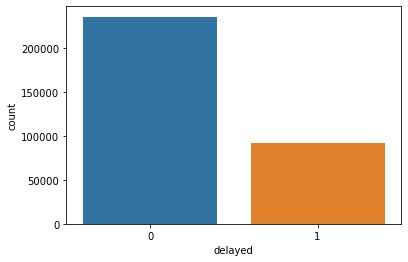

In [59]:
sns.countplot(p15['delayed'])

In [60]:
number_of_delayed = p15["delayed"].apply(lambda s: 1 if s>0 else 0);
print("Total number of flights: "+str(len(p15)))
print("Number of delayed flights: "+str(sum(number_of_delayed)))
print("Number of not delayed flights: "+str(len(p15)-sum(number_of_delayed)))
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(p15))*100)+"%")


Total number of flights: 327346
Number of delayed flights: 91524
Number of not delayed flights: 235822
Percentage of delayed flights: 27.959406866129417%


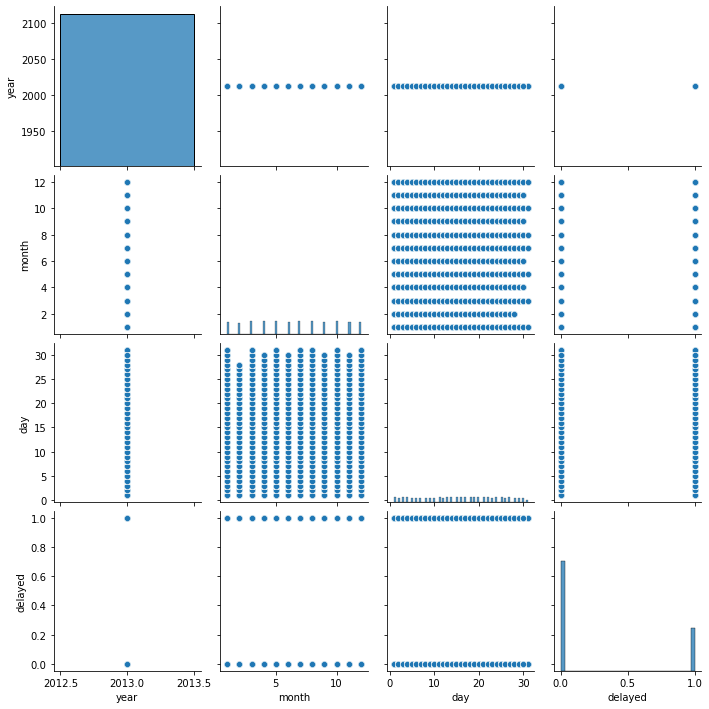

In [61]:
sns.pairplot(p15)

## Processed 45

In [62]:
p45.head()

,year,month,day,carrier,origin,dest,delayed
0,2013,1,1,UA,EWR,IAH,0
1,2013,1,1,UA,LGA,IAH,0
2,2013,1,1,AA,JFK,MIA,0
3,2013,1,1,B6,JFK,BQN,0
4,2013,1,1,DL,LGA,ATL,0


In [63]:
p45.isnull().sum()

year       0
month      0
day        0
carrier    0
origin     0
dest       0
delayed    0
dtype: int64

In [64]:
p45['delayed'].value_counts()

0    285066
1     42280
Name: delayed, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delayed', ylabel='count'>

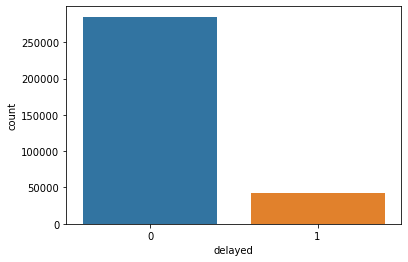

In [65]:
sns.countplot(p45['delayed'])

In [66]:
number_of_delayed = p45["delayed"].apply(lambda s: 1 if s>0 else 0);
print("Total number of flights: "+str(len(p45)))
print("Number of delayed flights: "+str(sum(number_of_delayed)))
print("Number of not delayed flights: "+str(len(p45)-sum(number_of_delayed)))
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(p45))*100)+"%")


Total number of flights: 327346
Number of delayed flights: 42280
Number of not delayed flights: 285066
Percentage of delayed flights: 12.91599714064018%


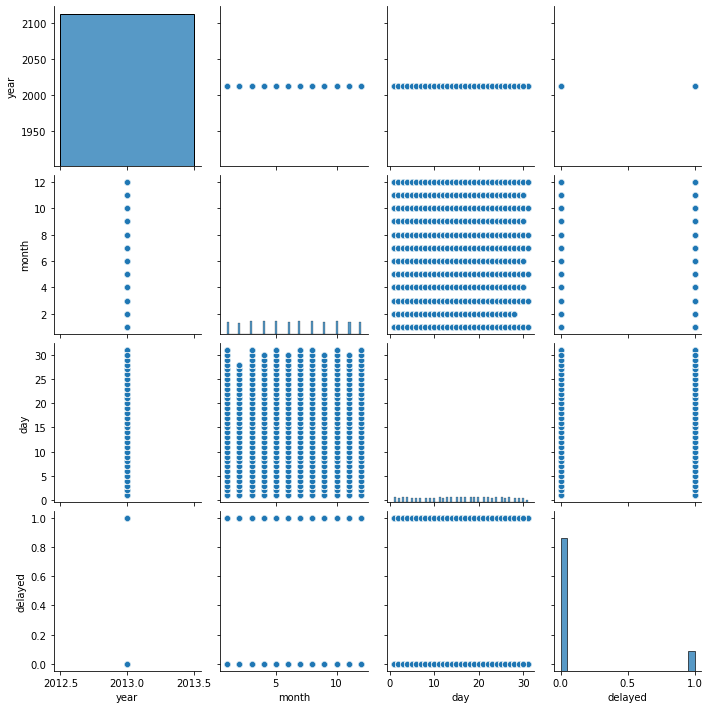

In [67]:
sns.pairplot(p45)

## Destination

In [68]:
dest.head()

,ATL,16837
0,ORD,16566
1,LAX,16026
2,BOS,15022
3,MCO,13967
4,CLT,13674


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ATL', ylabel='count'>

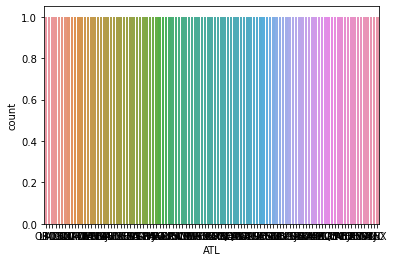

In [69]:
sns.countplot(dest['ATL'])

In [70]:
dest['ATL'].value_counts()

PVD    1
ACK    1
RIC    1
CHO    1
MDW    1
      ..
PIT    1
LAX    1
IAH    1
SBN    1
ORF    1
Name: ATL, Length: 103, dtype: int64

# Merging flights weather and planes

In [71]:
flights.shape

(327346, 19)

In [72]:
planes.shape

(3252, 9)

In [73]:
weather.shape

(26126, 15)

In [74]:
merge_1 = pd.merge(flights,planes)

In [75]:
merge_1.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_manu,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,1/1/2013 5:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,162.0,Turbo-fan
1,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,40,8/1/2013 14:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,162.0,Turbo-fan
2,2013,1,9,717.0,700,17.0,812.0,815,-3.0,UA,...,0,9/1/2013 7:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,162.0,Turbo-fan
3,2013,1,9,1143.0,1144,-1.0,1425.0,1445,-20.0,UA,...,44,9/1/2013 11:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,162.0,Turbo-fan
4,2013,1,13,835.0,824,11.0,1030.0,951,39.0,UA,...,24,13-01-2013 08:00,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,162.0,Turbo-fan


In [76]:
merge_1.shape

(273853, 27)

In [77]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273853 entries, 0 to 273852
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            273853 non-null  int64  
 1   month           273853 non-null  int64  
 2   day             273853 non-null  int64  
 3   dep_time        273853 non-null  float64
 4   sched_dep_time  273853 non-null  int64  
 5   dep_delay       273853 non-null  float64
 6   arr_time        273853 non-null  float64
 7   sched_arr_time  273853 non-null  int64  
 8   arr_delay       273853 non-null  float64
 9   carrier         273853 non-null  object 
 10  flight          273853 non-null  int64  
 11  tailnum         273853 non-null  object 
 12  origin          273853 non-null  object 
 13  dest            273853 non-null  object 
 14  air_time        273853 non-null  float64
 15  distance        273853 non-null  int64  
 16  hour            273853 non-null  int64  
 17  minute    

In [78]:
merge_2 = pd.merge(merge_1,weather,on=['origin','month','day','hour'])

In [79]:
merge_2.head()

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
1,2013,1,8,1415.0,1418,-3.0,1531.0,1552,-21.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
2,2013,1,8,1600.0,1444,76.0,1934.0,1802,92.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
3,2013,1,8,1448.0,1446,2.0,1541.0,1555,-14.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
4,2013,1,8,1542.0,1459,43.0,1707.0,1623,44.0,EV,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z


In [80]:
merge_2.shape

(272798, 38)

In [81]:
data = merge_2

# Feature Engineering

In [82]:
data.head()

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
1,2013,1,8,1415.0,1418,-3.0,1531.0,1552,-21.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
2,2013,1,8,1600.0,1444,76.0,1934.0,1802,92.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
3,2013,1,8,1448.0,1446,2.0,1541.0,1555,-14.0,UA,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z
4,2013,1,8,1542.0,1459,43.0,1707.0,1623,44.0,EV,...,39.02,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,2013-01-08T14:00:00Z


In [83]:
data.shape

(272798, 38)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272798 entries, 0 to 272797
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year_x          272798 non-null  int64  
 1   month           272798 non-null  int64  
 2   day             272798 non-null  int64  
 3   dep_time        272798 non-null  float64
 4   sched_dep_time  272798 non-null  int64  
 5   dep_delay       272798 non-null  float64
 6   arr_time        272798 non-null  float64
 7   sched_arr_time  272798 non-null  int64  
 8   arr_delay       272798 non-null  float64
 9   carrier         272798 non-null  object 
 10  flight          272798 non-null  int64  
 11  tailnum         272798 non-null  object 
 12  origin          272798 non-null  object 
 13  dest            272798 non-null  object 
 14  air_time        272798 non-null  float64
 15  distance        272798 non-null  int64  
 16  hour            272798 non-null  int64  
 17  minute    

In [85]:
data.drop(['year_x','day','tailnum','origin','dest','time_hour_x','model','year_y','time_hour_y'],axis=1,inplace=True)

In [86]:
data.shape

(272798, 29)

In [87]:
data['scheduled_time'] = data['sched_arr_time'] - data['sched_dep_time']
data['actual_time'] = data['arr_time'] - data['dep_time']

In [88]:
data['flight_delay'] = data['actual_time'] - data['scheduled_time']

In [89]:
data.drop(['scheduled_time','actual_time'],axis=1,inplace=True)

In [90]:
data.shape

(272798, 30)

In [91]:
data.shape

(272798, 30)

In [92]:
def chk(x):
    if x>0:
        return(1)
    else:
        return(0)

In [93]:
data["DELAYED"]=data["flight_delay"].apply(chk)

<AxesSubplot:>

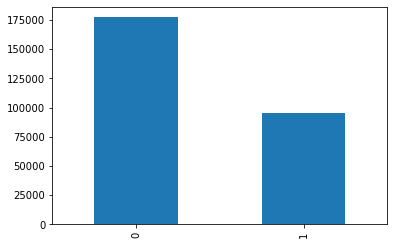

In [94]:
data['DELAYED'].value_counts().plot(kind='bar')

In [95]:
number_of_delayed = data['DELAYED'].apply(lambda s: 1 if s>0 else 0);
print("Total number of flights: "+str(len(data['DELAYED'])))
print("Number of delayed flights: "+str(sum(number_of_delayed)))
print("Number of not delayed flights: "+str(len(data['DELAYED'])-sum(number_of_delayed)))
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(data['DELAYED']))*100)+"%")

Total number of flights: 272798
Number of delayed flights: 95495
Number of not delayed flights: 177303
Percentage of delayed flights: 35.00575517415817%


# Encoding

## Label Encoding

In [96]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [97]:
data['type']= label_encoder.fit_transform(data['type'])
data['engine']= label_encoder.fit_transform(data['engine'])
data['manufacturer']= label_encoder.fit_transform(data['manufacturer'])

In [98]:
data.head()

,month,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,air_time,...,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,flight_delay,DELAYED
0,1,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,1579,150.0,...,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,-24.0,0
1,1,1415.0,1418,-3.0,1531.0,1552,-21.0,UA,619,122.0,...,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,-18.0,0
2,1,1600.0,1444,76.0,1934.0,1802,92.0,UA,315,250.0,...,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,-24.0,0
3,1,1448.0,1446,2.0,1541.0,1555,-14.0,UA,425,39.0,...,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,-16.0,0
4,1,1542.0,1459,43.0,1707.0,1623,44.0,EV,4581,120.0,...,28.94,66.85,230.0,9.20624,10.594357,0.0,1030.3,9.0,1.0,1


## One-Hot Encoding

In [99]:
df1=pd.get_dummies(data['carrier'])
data=pd.concat([data,df1],axis=1)
data.head()

,month,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,air_time,...,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
0,1,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,1579,150.0,...,0,0,0,0,0,1,0,0,0,0
1,1,1415.0,1418,-3.0,1531.0,1552,-21.0,UA,619,122.0,...,0,0,0,0,0,1,0,0,0,0
2,1,1600.0,1444,76.0,1934.0,1802,92.0,UA,315,250.0,...,0,0,0,0,0,1,0,0,0,0
3,1,1448.0,1446,2.0,1541.0,1555,-14.0,UA,425,39.0,...,0,0,0,0,0,1,0,0,0,0
4,1,1542.0,1459,43.0,1707.0,1623,44.0,EV,4581,120.0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
data.drop('carrier',axis=1,inplace=True)

In [101]:
data.head()

,month,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,...,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
0,1,1435.0,1440,-5.0,1717.0,1746,-29.0,1579,150.0,1085,...,0,0,0,0,0,1,0,0,0,0
1,1,1415.0,1418,-3.0,1531.0,1552,-21.0,619,122.0,719,...,0,0,0,0,0,1,0,0,0,0
2,1,1600.0,1444,76.0,1934.0,1802,92.0,315,250.0,1504,...,0,0,0,0,0,1,0,0,0,0
3,1,1448.0,1446,2.0,1541.0,1555,-14.0,425,39.0,200,...,0,0,0,0,0,1,0,0,0,0
4,1,1542.0,1459,43.0,1707.0,1623,44.0,4581,120.0,725,...,0,0,0,0,0,0,0,0,0,0


# Splitting the Dataset

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x = data.drop(['DELAYED'],axis=1)
x.head()

,month,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,...,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
0,1,1435.0,1440,-5.0,1717.0,1746,-29.0,1579,150.0,1085,...,0,0,0,0,0,1,0,0,0,0
1,1,1415.0,1418,-3.0,1531.0,1552,-21.0,619,122.0,719,...,0,0,0,0,0,1,0,0,0,0
2,1,1600.0,1444,76.0,1934.0,1802,92.0,315,250.0,1504,...,0,0,0,0,0,1,0,0,0,0
3,1,1448.0,1446,2.0,1541.0,1555,-14.0,425,39.0,200,...,0,0,0,0,0,1,0,0,0,0
4,1,1542.0,1459,43.0,1707.0,1623,44.0,4581,120.0,725,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y = data['DELAYED']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: DELAYED, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [107]:
y_pred = classifier.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9999413489736071


In [109]:
y_pred_probs = classifier.predict_proba(X_test)[:, 1]

In [110]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.999999996231053
[[44173     2]
 [    2 24023]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44175
           1       1.00      1.00      1.00     24025

    accuracy                           1.00     68200
   macro avg       1.00      1.00      1.00     68200
weighted avg       1.00      1.00      1.00     68200



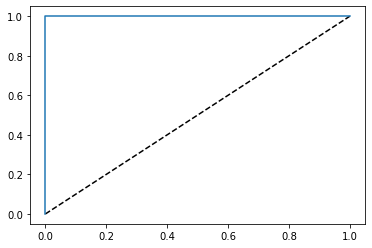

In [111]:
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.show()